### Assignment 3    |   Ben Kavouras    |   2/3/2023

Description of the program

In [1196]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Time
import time
import math

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

In [1197]:
# Part 2
# Create the arrays
a2 = np.zeros((20,20))
for i in range(len(a2)):
    a2[i,i] = 4
    if i < 19:
        a2[i,i+1] = -1
    if i > 0:
        a2[i,i-1] = -1
a2[0,19] = 1
a2[19,0] = 1
b2d = np.zeros((20,1))
b2d[19] = 100
b2i = np.zeros(20)
b2i[19] = 100

In [1198]:
def iter1(x,omega):
    n = len(x)
    x[0] = omega*(x[1]-x[n-1])/4+(1-omega)*x[0]
    for i in range(1,n-1):
        x[i] = omega*(x[i-1]+x[i+1])/4+(1-omega)*x[i]
    x[n-1] = omega*(1-x[0]+x[n-2])/4+(1-omega)*x[n-1]
    return x

In [1199]:
start = time.perf_counter()
solve1 = t.gaussPivot(a2,b2d)
end = time.perf_counter()
time1 = end-start

r1 = np.dot(a2,solve1) - b2d

start = time.perf_counter()
temp2,seq2 = t.LUdecomp(a2)
solve2 = t.LUsolve(temp2,b2d,seq2)
end = time.perf_counter()
time2 = end-start

r2 = np.dot(a2,solve2) - b2d

start = time.perf_counter()
solve3 = t.cramers(a2,b2d)
end = time.perf_counter()
time3 = end-start

r3 = np.dot(a2,solve3) - b2d

# Including the built-in numpy function again
start = time.perf_counter()
solve4 = np.linalg.solve(a2,b2d)
end = time.perf_counter()
time4 = end-start

r4 = np.dot(a2,solve4) - b2d

# vector of 0's for indirect methods
xguess = np.zeros(20)

start = time.perf_counter()
solve5,i1,omega = t.gaussSeidel(iter1,xguess)
end = time.perf_counter()
time5 = end-start

print(str(i1))

r5 = np.dot(a2,solve5) - b2i

xguess = np.zeros(20)

start = time.perf_counter()
solve6,i2 = t.conjGrad(a2,xguess,b2i)
end = time.perf_counter()
time6 = end-start

print(str(i2))

r6 = np.dot(a2,solve6) - b2i

normr1 = np.linalg.norm(r1)
normr2 = np.linalg.norm(r2)
normr3 = np.linalg.norm(r3)
normr4 = np.linalg.norm(r4)
normr5 = np.linalg.norm(r5)
normr6 = np.linalg.norm(r6)

print("The timings for each method:")
print(" gaussPivot   | %12.8f | (d)"%(time1))
print(" LUpivot      | %12.8f | (d)"%(time2))
print(" cramers      | %12.8f | (d)"%(time3))
print(" numpy        | %12.8f | (d)"%(time4))
print(" gaussSeidel  | %12.8f | (i)"%(time5))
print(" conjGrad     | %12.8f | (i)"%(time6))
print(" ")
if time1 < time2 and time1 < time3 and time1 < time4 and time1 < time5 and time1 < time6:
    print("gaussPivot is the fastest method for this system")
elif time2 < time1 and time2 < time3 and time2 < time4 and time2 < time5 and time2 < time6:
    print("LUpivot is the fastest method for this system")
elif time3 < time1 and time3 < time2 and time3 < time4 and time3 < time5 and time3 < time6:
    print("cramers is the fastest method for this system")
elif time4 < time1 and time4 < time2 and time4 < time3 and time4 < time5 and time4 < time6:
    print("numpy is the fastest method for this system")
elif time5 < time1 and time5 < time2 and time5 < time3 and time5 < time4 and time5 < time6:
    print("gaussSeidel is the fastest method for this system")
elif time6 < time1 and time6 < time2 and time6 < time3 and time6 < time4 and time6 < time5:
    print("conjGrad is the fastest method for this system")
normr5 /= 100
print(" ")
print("The norm of the values in r for each method:")
print(" gaussPivot   | %12.8f | (d)"%(normr1))
print(" LUpivot      | %12.8f | (d)"%(normr2))
print(" cramers      | %12.8f | (d)"%(normr3))
print(" numpy        | %12.8f | (d)"%(normr4))
print(" gaussSeidel  | %12.8f | (i)"%(normr5))
print(" conjGrad     | %12.8f | (i)"%(normr6))
print(" ")
if normr1 < normr2 and normr1 < normr3 and normr1 < normr4 and normr1 < normr5 and normr1 < normr6:
    print("gaussPivot is the most accurate method for this system")
elif normr2 < normr1 and normr2 < normr3 and normr2 < normr4 and normr2 < normr5 and normr2 < normr6:
    print("LUpivot is the most accurate method for this system")
elif normr3 < normr1 and normr3 < normr2 and normr3 < normr4 and normr3 < normr5 and normr3 < normr6:
    print("cramers is the most accurate method for this system")
elif normr4 < normr1 and normr4 < normr2 and normr4 < normr3 and normr4 < normr5 and normr4 < normr6:
    print("numpy is the most accurate method for this system")
elif normr5 < normr1 and normr5 < normr2 and normr5 < normr3 and normr5 < normr4 and normr5 < normr6:
    print("gaussSeidel is the most accurate method for this system")
elif normr6 < normr1 and normr6 < normr2 and normr6 < normr3 and normr6 < normr4 and normr6 < normr5:
    print("conjGrad is the most accurate method for this system")
else:
    print("There are multiple accurate methods for this system")


17
19
The timings for each method:
 gaussPivot   |   0.00087830 | (d)
 LUpivot      |   0.00104500 | (d)
 cramers      |   0.00028950 | (d)
 numpy        |   0.00020380 | (d)
 gaussSeidel  |   0.00044860 | (i)
 conjGrad     |   0.00090660 | (i)
 
numpy is the fastest method for this system
 
The norm of the values in r for each method:
 gaussPivot   |  57.47681921 | (d)
 LUpivot      |   1.46471126 | (d)
 cramers      |  30.56356718 | (d)
 numpy        |   0.00000000 | (d)
 gaussSeidel  |   0.99226151 | (i)
 conjGrad     |   0.00000276 | (i)
 
numpy is the most accurate method for this system


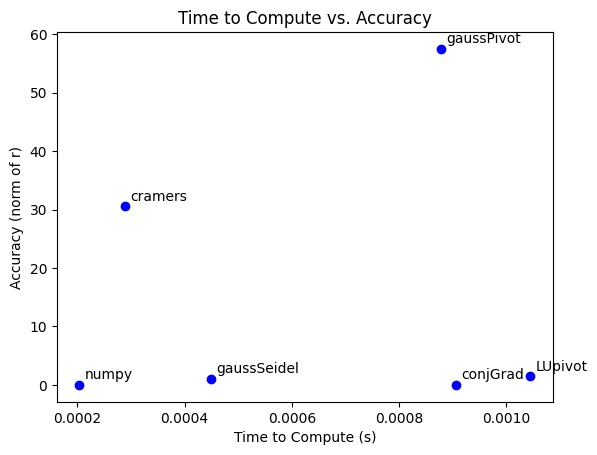

In [1200]:
performance = np.array([time1,time2,time3,time4,time5,time6])
accuracy = np.array([normr1,normr2,normr3,normr4,normr5,normr6])
names = np.array(["gaussPivot","LUpivot","cramers","numpy","gaussSeidel","conjGrad"])
for i in range(6):
    plt.plot(performance[i],accuracy[i],'bo')
    plt.text(performance[i]+.00001,accuracy[i]+1,names[i])

plt.xlabel("Time to Compute (s)")
plt.ylabel("Accuracy (norm of r)")
plt.title("Time to Compute vs. Accuracy")
plt.show()

In [1201]:
# Part 3
# Create the arrays
a3 = np.zeros((9,9))
for i in range(len(a3)):
    a3[i,i] = -4
    if i < 8:
        a3[i,i+1] = 1
    if i > 0:
        a3[i,i-1] = 1
    if i > 2:
        a3[i,i-3] = 1
    if i < 6:
        a3[i,i+3] = 1
    if (i+1)%3 == 0 and i < 8:
       a3[i,i+1] = 0
    if (i)%3 == 0 and i > 0:
        a3[i,i-1] = 0
b3 = np.zeros(9)
b3[2] = -100
b3[5] = -100
b3[6] = -200
b3[7] = -200
b3[8] = -300

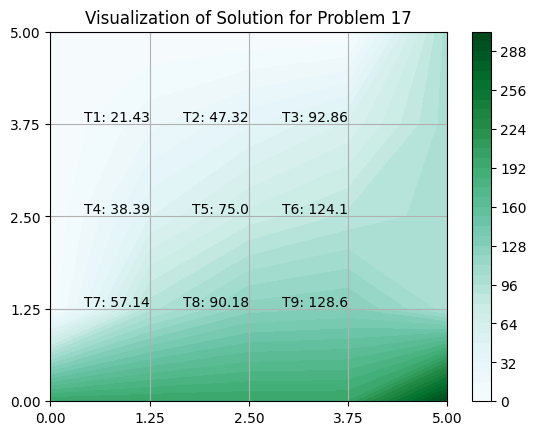

In [1202]:
xguess = np.zeros(9)
solve3a,i = t.conjGrad(a3,xguess,b3)

solve3a_2d = np.zeros((5,5))
solve3a_2d[0,:] = 0,0,0,0,100
solve3a_2d[1,:] = 0,solve3a[0],solve3a[1],solve3a[2],100
solve3a_2d[2,:] = 0,solve3a[3],solve3a[4],solve3a[5],100
solve3a_2d[3,:] = 0,solve3a[6],solve3a[7],solve3a[8],100
solve3a_2d[4,:] = 200,200,200,200,300



x = np.linspace(0,5,5)
y = np.linspace(5,0,5)
X,Y = np.meshgrid(x,y)

plt.subplots()
plt.contourf(X,Y,solve3a_2d,levels=40,cmap='BuGn')

ticks = np.linspace(0,5,5)

plt.title("Visualization of Solution for Problem 17")

plt.xticks(ticks)
plt.yticks(ticks)

flip3a = np.fliplr(solve3a_2d)

for i, xtick in enumerate(ticks):
    for j, ytick in enumerate(ticks):
        if xtick != 0 and xtick != 5 and ytick != 0 and ytick != 5:
            plt.text(xtick,ytick,f'T{i+6-((j-1)*3)}: {flip3a[i,j]:{3}.{4}}',ha='right',va='bottom')

plt.grid()
plt.colorbar()
plt.show()

In [1203]:
a3big = np.zeros((1600,1600))
for i in range(len(a3big)):
    a3big[i,i] = -4
    if i < 1599:
        a3big[i,i+1] = 1
    if i > 0:
        a3big[i,i-1] = 1
    if i > 2:
        a3big[i,i-3] = 1
    if i < 1597:
        a3big[i,i+3] = 1
    if (i+1)%3 == 0 and i < 1599:
       a3big[i,i+1] = 0
    if (i)%3 == 0 and i > 0:
        a3big[i,i-1] = 0
b3big = np.zeros(1600)
for i in range(len(b3big)):
    if i > 1599-40:
        b3big[i] = -200
    elif (i+1)%40 == 0:
        b3big[i] = -100
b3big[1599] = -300

In [1204]:
xguess = np.zeros(1600)
solve3abig,i = t.conjGrad(a3big,xguess,b3big)

num = 0
index1 = 0
solve3a_2d2 = np.zeros((42,42))
for i in range(0,1764):
    if i < 41 and i > 0:
        solve3a_2d2[0,i] = b3big[i-1]
    elif i > 41 and i < 1764-42:
        if num > 0 and num < 41:
            solve3a_2d2[math.floor(i/42),num] = -solve3abig[index1]
            index1 += 1
        elif num == 0:
            solve3a_2d2[math.floor(i/42),0] = 0
        elif num == 41:
            solve3a_2d2[math.floor(i/42),41] = 100
    elif i > 1764-42 and i < 1763:
        solve3a_2d2[41,num] = 200
    
    num += 1
    if num > 41:
        num = 0

solve3a_2d2[0,0] = 0
solve3a_2d2[0,41] = 100
solve3a_2d2[41,0] = 200
solve3a_2d2[41,41] = 300

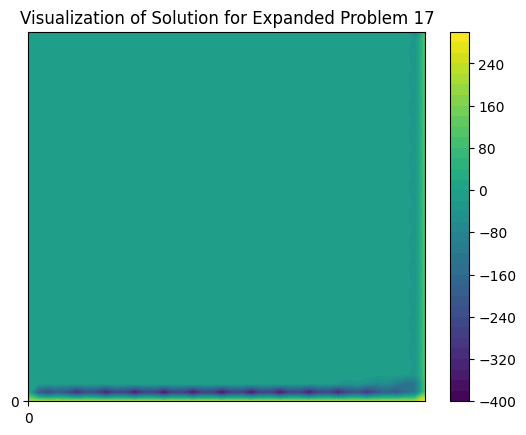

In [1205]:
x = np.linspace(0,42,42)
y = np.linspace(42,0,42)
X,Y = np.meshgrid(x,y)

plt.subplots()
plt.contourf(X,Y,solve3a_2d2,levels=40)

ticks = np.linspace(0,42,1)

plt.title("Visualization of Solution for Expanded Problem 17")

plt.xticks(ticks)
plt.yticks(ticks)

flip3a2 = np.fliplr(solve3a_2d2)

#plt.grid()
plt.colorbar()
plt.show()